In [313]:
import pandas as pd
df=pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [314]:
df.columns=df.columns.str.lower()              #changing column names to lower case

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Year of release contains some missing values. Critic score, user score and rating contain a lot of missing values.We will change the datta type of user score to float.

In [316]:
df['user_score'].unique()      

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

user score contains tbd to change the data type of this column to float we need to replace tbd by nan which pandas recognises and reads as missing for float type data.

In [317]:
import numpy as np
df.loc[df['user_score']=='tbd','user_score']=np.nan

In [318]:
df['user_score']=df['user_score'].astype(float)   #changing data type to float

In [319]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Since rating is based on the content of the game we fill missing rating for a game only if the rating for the same game on some other platform is available otherwise we leave it as it is.  

In [320]:
rating=df.pivot_table(index=['name','rating'],values='platform',aggfunc='count').reset_index()
def find(row):
    n=row['name']
    #print(n)
    if row['platform']==rating[rating['name']==n]['platform'].max():
        return 1
    return 0
rating['max']=rating.apply(find,axis=1)
rating=rating[rating['max']==1][['name','rating']]

In [321]:
rating=rating.set_index('name')
rating=rating.to_dict()    

In [322]:
def fillrate(row):
    n=row['name']
    if n in rating['rating'].keys():
        if type(row['rating'])==float:
            row['rating']=rating['rating'][n]
            return row['rating']
    return row['rating']
df['rating']=df.apply(fillrate,axis=1)


In [323]:
#total sales for each game
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

In [324]:
df[df['year_of_release'].isnull()].count()/len(df)

name               0.016093
platform           0.016093
year_of_release    0.000000
genre              0.016093
na_sales           0.016093
eu_sales           0.016093
jp_sales           0.016093
other_sales        0.016093
critic_score       0.009213
user_score         0.007598
rating             0.011726
total_sales        0.016093
dtype: float64

Data for which year is missing accounts for 1.6% of our data. Hence we can leave missing year as it is.

In [325]:
df[df['year_of_release'].isnull()]['total_sales'].max()          

5.239999999999999

In [326]:
df['total_sales'].max()

82.53999999999999

The rows for which year of release is missing is not very important as the total sales maximum value is very small as compared to that for the entire data.

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             10386 non-null object
total_sales        16715 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


# Analyzing the data

In [330]:
#grouping data by year
df.groupby('year_of_release').count().sort_values('platform',ascending=False)

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
year_of_release,,,,,,,,,,,
2008.0,1427,1427,1427,1427,1427,1427,1427,715,661,996,1427
2009.0,1426,1426,1426,1426,1426,1426,1426,651,614,1024,1426
2010.0,1255,1255,1255,1255,1255,1255,1255,500,467,824,1255
2007.0,1197,1197,1197,1197,1197,1197,1197,692,629,833,1197
2011.0,1136,1136,1136,1136,1136,1136,1136,500,501,730,1136
2006.0,1006,1006,1006,1006,1006,1006,1006,620,552,687,1006
2005.0,939,939,939,939,939,939,939,655,583,722,939
2002.0,829,829,829,829,829,829,829,627,464,668,829
2003.0,775,775,775,775,775,775,775,585,516,628,775


Text(0, 0.5, 'number of games released')

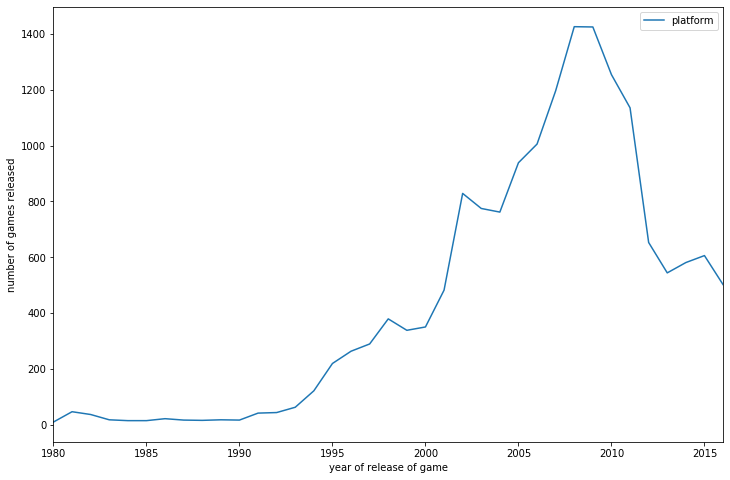

In [331]:
import matplotlib.pyplot as plt
df.groupby('year_of_release').count().plot(y='platform',figsize=(12,8))
plt.xlabel('year of release of game')
plt.ylabel('number of games released')

The time period of our dataset ranges from 1980 to 2016.We see that from 1999 to 2008 sales have increased and then they have fallen consistently till 2016 except for a rise in 2014 and 2015.For forecasting sales and planning campaign for 2017 data upto 1999 is not significant.Also for many years befor 1995 the critic score and user score is missing for all games released in that year and it is probably because that data is too old.The two missing names of games belong to year 1993. Most of the missing values in our data belong to old time period(1980-1994).

In [332]:
df[df['year_of_release']<=1999].count()/df['year_of_release'].count()

name               0.120029
platform           0.120151
year_of_release    0.120151
genre              0.120029
na_sales           0.120151
eu_sales           0.120151
jp_sales           0.120151
other_sales        0.120151
critic_score       0.005837
user_score         0.005594
rating             0.011067
total_sales        0.120151
dtype: float64

Although data before 1999 is not significant for this analysis but we loose about 12% data.

In [333]:
df.groupby('year_of_release')['total_sales'].mean().sort_values(ascending=False).head()

year_of_release
1989.0    4.320588
1985.0    3.853571
1984.0    3.596429
1988.0    3.147333
1990.0    3.085625
Name: total_sales, dtype: float64

We find something interesting here. Although the number of games released in 1989 is only 17 but still it recorded the highest average sales which means that sales were very high in this year as compared to all other years.

Text(0, 0.5, 'total_sales')

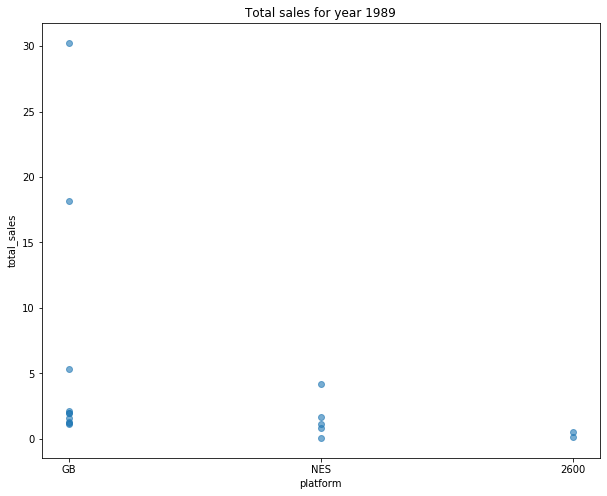

In [334]:
import matplotlib.pyplot as plt
a=df[df['year_of_release']==1989]['platform']
b=df[df['year_of_release']==1989]['total_sales']
plt.figure(figsize=(10,8))
plt.scatter(x=a,y=b,alpha=0.6)
plt.title('Total sales for year 1989')
plt.xlabel('platform')
plt.ylabel('total_sales')


The reason for the large average is that GB had a huge sale in 1989

In [335]:
#platforms with highest number of sales
df.groupby('platform').count().sort_values('total_sales',ascending=False).head()

,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
platform,,,,,,,,,,,
PS2,2161,2127,2161,2161,2161,2161,2161,1298,1241,1503,2161
DS,2151,2121,2151,2151,2151,2151,2151,717,516,1303,2151
PS3,1331,1306,1331,1331,1331,1331,1331,820,877,992,1331
Wii,1320,1286,1320,1320,1320,1320,1320,585,560,1024,1320
X360,1262,1232,1262,1262,1262,1262,1262,916,966,1079,1262


In [336]:
#platforms with maximum sales
sales_per_platform=df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
sales_per_platform.head(10)

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


We select the first 6 platforms as the sales for PS and GBA differ significantly

In [337]:
platform=p.loc[0:5]['platform']     #list of most popular platforms
platform.to_list()

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Distribution of data for each popular platform by year

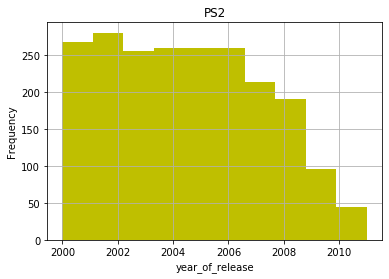

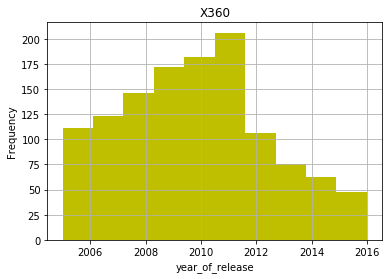

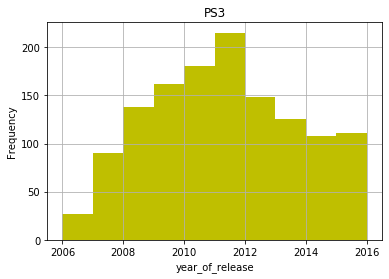

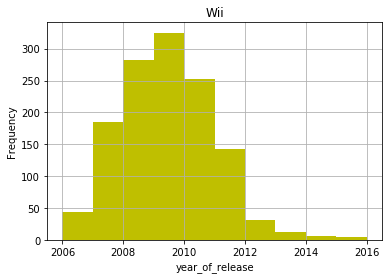

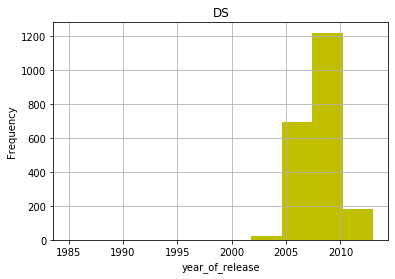

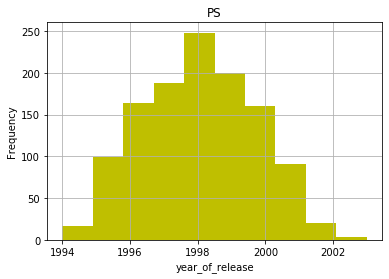

In [338]:
for i in platform:
    
    plt.figure()
    df[df['platform']==i]['year_of_release'].plot(x='year_of_release',kind='hist',color='y',grid=True)
    plt.title(i)
    plt.xlabel('year_of_release')
plt.show()

PS2:PS2 was popular from 2000 to 2006.The number of sales have consistently fallen from 2006 to 2011.PS2 has the highest number of sales in our data but it made no sale in 2016.

X360:Sales have consistently increased from 2006 to 2010 and then fallen till 2016.

PS3:Sales increased from 2006 to 2011 and then fell till 2016.But it still made the highest number of sales in 2016 around 110 units out of all the platforms with highest sales in the data.

Wii:Made highest number of sales in 2010 and lowest in 2016

DS:DS seems like a platform established quite long ago.It has made sales in 1985,very few though.And no sales in 2016.

PS:The histogram shows that PS is an old platform, made it's first sale in 1994.Had the highest sales in 1998.Sales for PS rose from 1994 to 1998 and then fell from 1998 to 2003.This platform has faded. 

X360,PS3,Wii show similar pattern for sales, sales increase from 2006 to 2010 and then fall till 2016.All these platforms were probably competitors during the same period.

Scatter plots for a better picture of distribution of data by year for the popular platforms.

<Figure size 432x288 with 0 Axes>

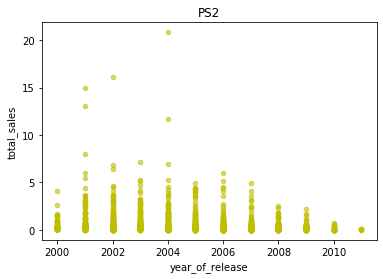

<Figure size 432x288 with 0 Axes>

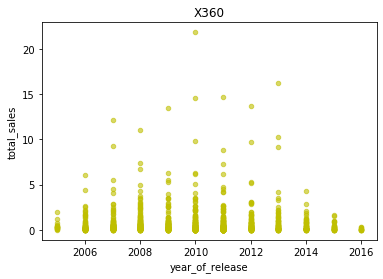

<Figure size 432x288 with 0 Axes>

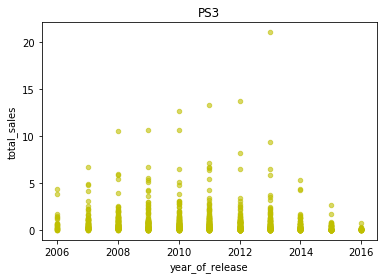

<Figure size 432x288 with 0 Axes>

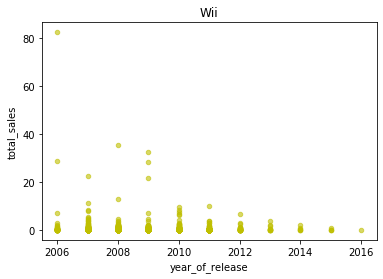

<Figure size 432x288 with 0 Axes>

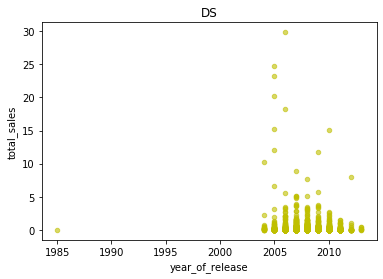

<Figure size 432x288 with 0 Axes>

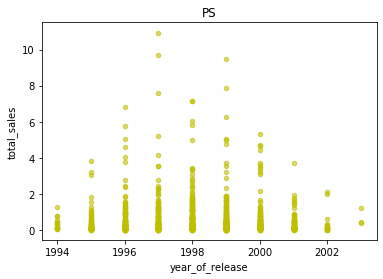

In [339]:
for i in platform:
    
    plt.figure()
    df[df['platform']==i].plot(x='year_of_release',y='total_sales',kind='scatter',color='y',alpha=0.6)
    plt.title(i)
    plt.xlabel('year_of_release')
    plt.ylabel('total_sales')


Scatter plot for DS shows it made it's first sale in 1985 then no sales till 2004.Made most of it's sales in 2005. Last sale in 2013.

In [340]:
#lifespan of a platform
(df.groupby('platform')['year_of_release'].max()-df.groupby('platform')['year_of_release'].min()).mean()

7.612903225806452

It usually takes 7 years for platforms to come up and then fade.

In [341]:
platform_yearwise=df.pivot_table(index='platform',columns='year_of_release',values='total_sales',aggfunc='count')
#print(q)
platform_yearwise=platform_yearwise[(platform_yearwise[2016].isnull()) & (platform_yearwise[2015].isnull())]
platform_yearwise['total']=platform_yearwise.sum(axis=1)
platform_yearwise['total'].sort_values(ascending=False)


platform
PS2     2127.0
DS      2121.0
PS      1190.0
GBA      811.0
XB       803.0
GC       542.0
N64      316.0
SNES     239.0
SAT      173.0
2600     116.0
NES       98.0
GB        97.0
DC        52.0
GEN       29.0
NG        12.0
WS         6.0
SCD        6.0
3DO        3.0
TG16       2.0
GG         1.0
PCFX       1.0
Name: total, dtype: float64

PS2,DS,PS,GBA,XB were quite popular before but have 0 sales now. 

In [342]:
df=df[df['year_of_release']>=1999].reset_index()         #keeping only data from 1999 to 2016 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14808 entries, 0 to 14807
Data columns (total 13 columns):
index              14808 non-null int64
name               14808 non-null object
platform           14808 non-null object
year_of_release    14808 non-null float64
genre              14808 non-null object
na_sales           14808 non-null float64
eu_sales           14808 non-null float64
jp_sales           14808 non-null float64
other_sales        14808 non-null float64
critic_score       7926 non-null float64
user_score         7402 non-null float64
rating             10060 non-null object
total_sales        14808 non-null float64
dtypes: float64(8), int64(1), object(4)
memory usage: 1.5+ MB


Filling missing values for user score and critic score for a game with the average score for that game on different platforms. The games for which no user and critic score is available will be left as it is.

In [343]:
name_dict=df.groupby('name')[['user_score','critic_score']].mean().to_dict()
#print(name_dict)
score=['user_score','critic_score']

In [344]:
for i in score:
    def filler(row):
        if np.isnan(row[i]):
            return name_dict[i][row['name']]
        return row[i]
    
    df[i]=df.apply(filler,axis=1)    

In [345]:
#calculting growth for platforms to find which ones are growing and which ones are shrinking and which are most profitable

platforms=df.pivot_table(index='platform',columns='year_of_release',values='total_sales',aggfunc='sum')
#print(platforms['platform'])
growth=pd.DataFrame()
for i in range(1999,2016):
    growth[i+1]=(platforms[i+1]-platforms[i])/platforms[i]     
  #  print(growth[i+1])   
growth[range(2008,2017)]


,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,-0.187342,0.101441,-0.226445,-0.365174,-0.455004
DC,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,-0.011093,-0.177345,-0.288774,-0.692072,-0.579450,-0.860127,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,0.338362,0.361514,0.435837,0.442751,-0.337140,-0.466839,0.072698,-0.358434,-0.383803
PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'profitable platforms')

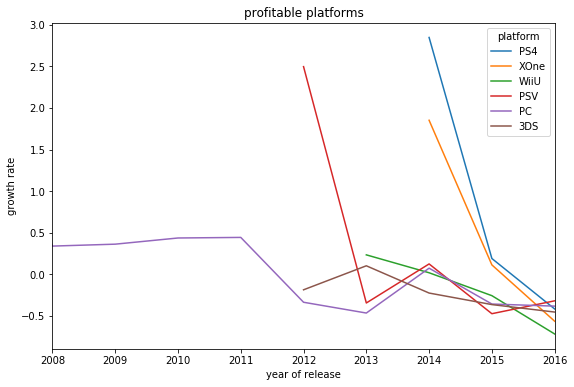

In [346]:
growing=growth.loc[['PS4','XOne','WiiU','PSV','PC','3DS'],]
growing.transpose().plot(figsize=(9,6))
plt.xlim(2008,2016)
plt.xlabel('year of release')
plt.ylabel('growth rate')
plt.title('profitable platforms')

Text(0.5, 1.0, 'shrinking platforms')

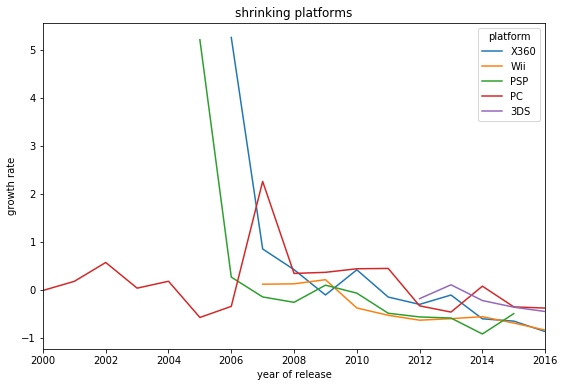

In [347]:
shrinking=['X360','Wii','PSP','PC','3DS']
shrinking=growth.loc[['X360','Wii','PSP','PC','3DS'],]
shrinking.transpose().plot(figsize=(9,6))
plt.xlabel('year of release')
plt.ylabel('growth rate')
plt.title('shrinking platforms')

It seems like all platforms are shrinking! 
Considering that it takes 7 years for platforms to emerge and fade we can say that PS4,XOne,WiiU,PSV,3DS might grow in the future. X360,Wii,PSP,PS3,PC are shrinking. All the growing platforms i.e PS4,XOne,WiiU,PSV,3DS and PC are potentially profitable platforms.PC could be profitable because it has been consistent and its sales fell by much less than that that of others.Also it seems the most popular platforms have either faded or are shrinking.   

Text(0.5, 1.0, 'popular platforms which have faded')

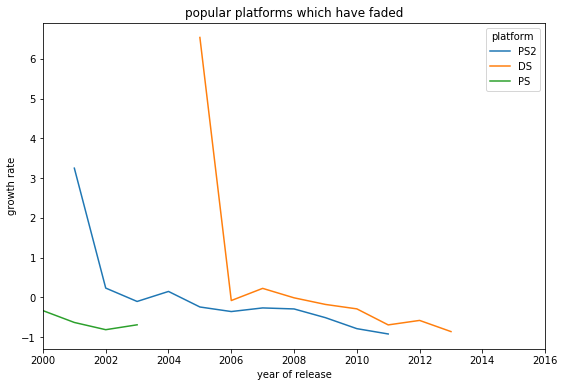

In [348]:
#most popular platforms in the data which have faded
faded=growth.loc[['PS2','DS','PS'],]
faded.transpose().plot(figsize=(9,6))
plt.xlabel('year of release')
plt.ylabel('growth rate')
plt.title('popular platforms which have faded')

In [349]:
platform                  #most popular platforms

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
Name: platform, dtype: object

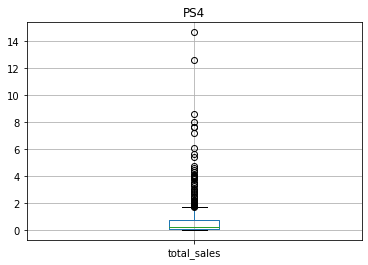

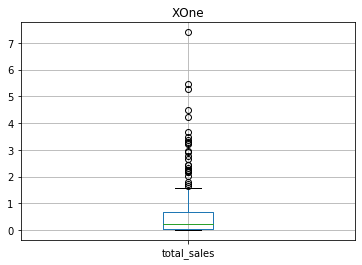

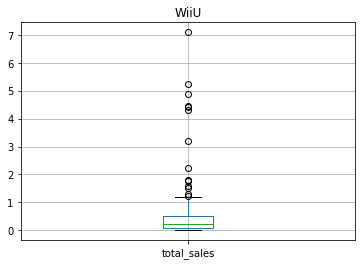

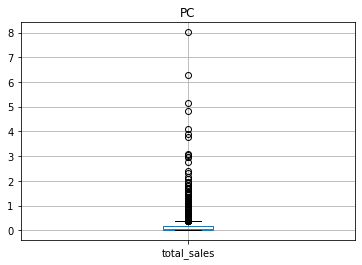

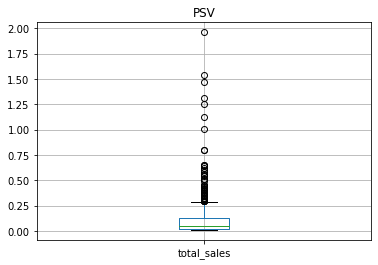

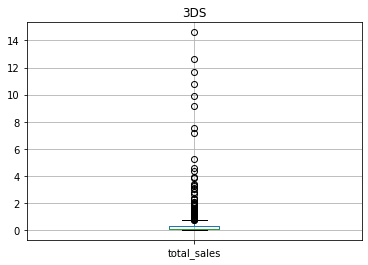

In [350]:
profitable=['PS4','XOne','WiiU','PC','PSV','3DS']
for i in profitable:
    plt.figure()
    df[df['platform']==i][['name','total_sales']].boxplot()
    plt.title(i)
    #plt.ylim(0,6)

The average(median) sales for XOne,WiiU,PS4 are similar and close to 0.The average sale for PC and PSV and 3DS is very close to 0.All of them contain many outliers.The average sales of PSV are very low and the maximum sale is 2mil USD.PS4 and 3DS has maximum sale of around 14mil USD and XOne,WiiU and PC have maximum sales of 7- 8mil USD.PC and PS4 have much more outliers than others.Sales for PS4 are much more dispersed than others.3DS has made many sales between 8 to 10 milUSD.The left whisker is at 0 for all 6 platforms but the right whisker has different value for all 6 .The difference in sales for these platforms is significant. 

Looking at the boxplot we can disregard PSV as a potentially profitable platform.

# Effect of reviews

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14808 entries, 0 to 14807
Data columns (total 13 columns):
index              14808 non-null int64
name               14808 non-null object
platform           14808 non-null object
year_of_release    14808 non-null float64
genre              14808 non-null object
na_sales           14808 non-null float64
eu_sales           14808 non-null float64
jp_sales           14808 non-null float64
other_sales        14808 non-null float64
critic_score       8803 non-null float64
user_score         8396 non-null float64
rating             10060 non-null object
total_sales        14808 non-null float64
dtypes: float64(8), int64(1), object(4)
memory usage: 1.5+ MB


In [352]:
for i in platform:
    print(i,df[df['platform']==i]['critic_score'].count()/len(df[df['platform']==i]))

PS2 0.6614950634696756
X360 0.788961038961039
PS3 0.7075038284839203
Wii 0.5171073094867807
DS 0.3712264150943396
PS 0.33755274261603374


Since we have 79% data on critic score for platform X360 we choose this platform to analyse the effect of reviews.

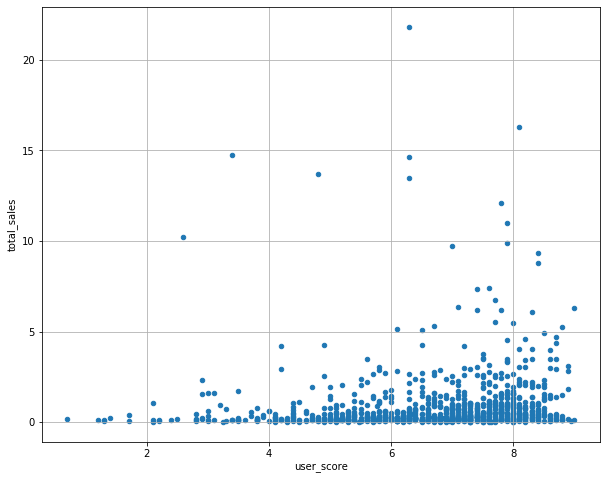

In [353]:
#scatter plot for user score and total sales
df[df['platform']=='X360'].plot(x='user_score',y='total_sales',kind='scatter',figsize=(10,8),grid=True)

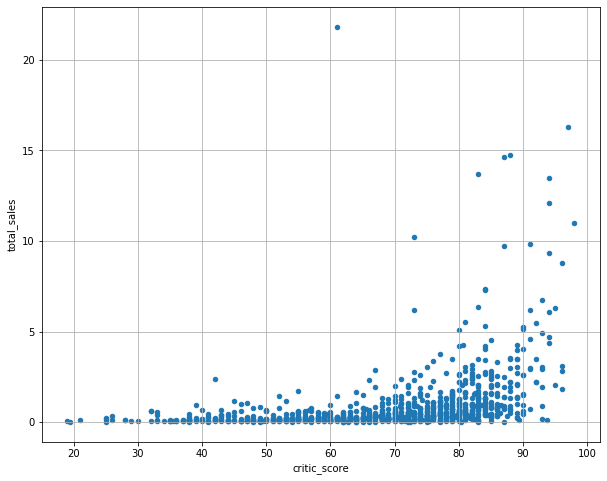

In [354]:
#scatter plot for critic score and total sales
df[df['platform']=='X360'].plot(x='critic_score',y='total_sales',kind='scatter',figsize=(10,8),grid=True)

In [355]:
df[df['platform']=='X360'][['user_score','critic_score','total_sales']].corr()  #calculating correlation coefficient

,user_score,critic_score,total_sales
user_score,1.000000,0.550957,0.116161
critic_score,0.550957,1.000000,0.379073
total_sales,0.116161,0.379073,1.000000


The relation between user score and total sales is not very clear from the scatter plot and it is because the correlation is quite low.As expected the correlation coefficient is positive.We can say that total score and user score are not very highly related but user score does effect total sales to some degree. 

From the correlation coefficient we can say that total sales depends more linearly on critic score than user score which is also clear from the scatter plots. 

Sales of the games sold on X360 on different platforms

In [356]:
platform_name=df[df['platform']=='X360']['name'].unique()


Text(0.5, 1.0, 'total sales on each platform')

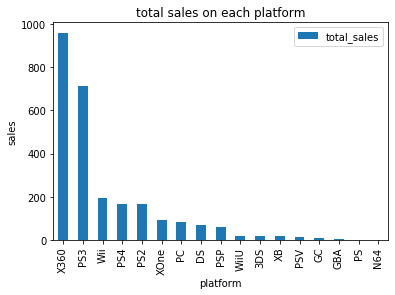

In [379]:
(df.query("name in @platform_name")
 .pivot_table(index='platform',values='total_sales',aggfunc='sum')
 .sort_values('total_sales',ascending=False)
 .plot(kind='bar'))
plt.ylabel('sales')
plt.title('total sales on each platform')

There is a huge drop in sales of these games on all platforms other than X360 and PS3.These games did not sell well on the potenially profitable platforms we selected.

# Studying effect of genres

Text(0.5, 1.0, 'number of games of each genre')

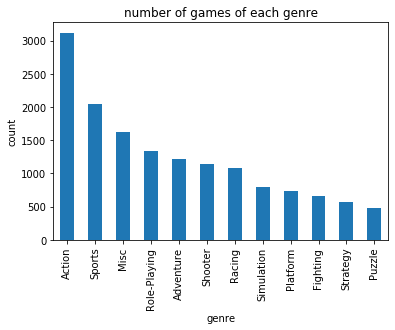

In [380]:
# genres by popularity
y1=df.groupby('genre')['total_sales'].count().sort_values(ascending=False)
plt.figure()
y1.plot(kind='bar')
plt.ylabel('count')
plt.title('number of games of each genre')

Text(0.5, 1.0, 'total sales for each genre')

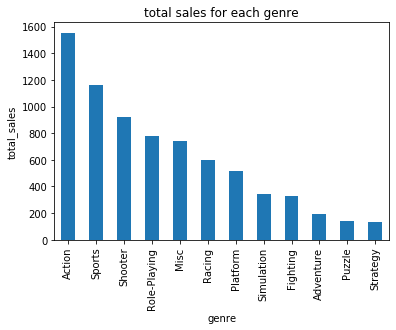

In [381]:
# total sales for each genre
df.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('total_sales')
plt.title('total sales for each genre')

Action games are most popular and most profitable so are sports games. But shooter games are sixth in popularity but 3rd in sales.Adventure games have high number of sales but very low total sales.

In [360]:
#the most profitable genre for the most popular platforms
genre=df.pivot_table(index=['platform','genre'],values='total_sales',aggfunc='sum').reset_index()
#print(genre)
def profit(row):
    i=row['platform']
    if i in platform.to_list():
        if row['total_sales']==genre[genre['platform']==i]['total_sales'].max():
            return 1
    return 0
genre['max']=genre.apply(profit,axis=1) 
genre[genre['max']==1]
    

,platform,genre,total_sales,max
24,DS,Misc,135.56,1
90,PS,Action,54.42,1
102,PS2,Action,272.38,1
114,PS3,Action,297.87,1
176,Wii,Sports,286.49,1
198,X360,Shooter,275.62,1


We see that for the most popular platforms most profitable genre is different.Hence we cannot generalise the most profitable genre.

# User profile for each region

# Top five platforms in each region and their market share

Market share of different regions for the top 5 platforms in region na

In [361]:
na=df.groupby('platform')[['na_sales','eu_sales','jp_sales','other_sales','total_sales']].sum().sort_values('na_sales',ascending=False)
na['na_share']=na['na_sales']/df['na_sales'].sum()
na['eu_share']=na['eu_sales']/df['eu_sales'].sum()
na['jp_share']=na['jp_sales']/df['jp_sales'].sum()
na['other_share']=na['other_sales']/df['other_sales'].sum()
na=na.head()
na

,na_sales,eu_sales,jp_sales,other_sales,total_sales,na_share,eu_share,jp_share,other_share
platform,,,,,,,,,
X360,595.74,268.32,12.30,84.88,961.24,0.162963,0.124900,0.014168,0.114990
PS2,572.92,332.63,137.54,190.47,1233.56,0.156721,0.154835,0.158427,0.258037
Wii,486.87,258.32,68.28,77.71,891.18,0.133182,0.120245,0.078649,0.105277
PS3,390.13,327.21,79.41,134.59,931.34,0.106719,0.152313,0.091469,0.182334
DS,380.31,188.41,175.00,59.04,802.76,0.104033,0.087703,0.201576,0.079984


Text(0.5, 1.0, 'Top 5 platforms in Na region')

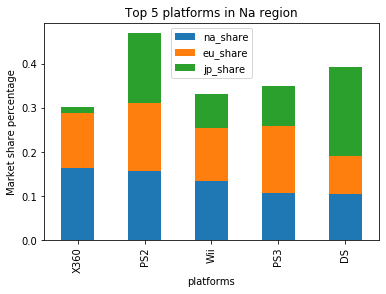

In [362]:
na[['na_share','eu_share','jp_share']].plot(kind='bar',stacked=True)
plt.xlabel('platforms')
plt.ylabel('Market share percentage')
plt.title('Top 5 platforms in Na region')

X360 has the highest market share for na region.

Market share of different regions for the top 5 platforms in region eu

In [363]:
eu=df.groupby('platform')[['na_sales','eu_sales','jp_sales','other_sales','total_sales']].sum().sort_values('eu_sales',ascending=False)
eu['na_share']=eu['na_sales']/df['na_sales'].sum()
eu['eu_share']=eu['eu_sales']/df['eu_sales'].sum()
eu['jp_share']=eu['jp_sales']/df['jp_sales'].sum()
eu['other_share']=eu['other_sales']/df['other_sales'].sum()
eu=eu.head()
eu

,na_sales,eu_sales,jp_sales,other_sales,total_sales,na_share,eu_share,jp_share,other_share
platform,,,,,,,,,
PS2,572.92,332.63,137.54,190.47,1233.56,0.156721,0.154835,0.158427,0.258037
PS3,390.13,327.21,79.41,134.59,931.34,0.106719,0.152313,0.091469,0.182334
X360,595.74,268.32,12.30,84.88,961.24,0.162963,0.124900,0.014168,0.114990
Wii,486.87,258.32,68.28,77.71,891.18,0.133182,0.120245,0.078649,0.105277
DS,380.31,188.41,175.00,59.04,802.76,0.104033,0.087703,0.201576,0.079984


Text(0.5, 1.0, 'Top 5 platforms in Eu region')

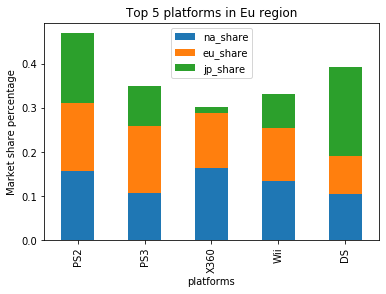

In [364]:
eu[['na_share','eu_share','jp_share']].plot(kind='bar',stacked=True)
plt.xlabel('platforms')
plt.ylabel('Market share percentage')
plt.title('Top 5 platforms in Eu region')

PS2 has the highest market share for eu region.

Market share of different regions for the top 5 platforms in region jp

In [365]:
jp=df.groupby('platform')[['na_sales','eu_sales','jp_sales','other_sales','total_sales']].sum().sort_values('jp_sales',ascending=False)
jp['na_share']=jp['na_sales']/df['na_sales'].sum()
jp['eu_share']=jp['eu_sales']/df['eu_sales'].sum()
jp['jp_share']=jp['jp_sales']/df['jp_sales'].sum()
jp['other_share']=jp['other_sales']/df['other_sales'].sum()
jp=jp.head()
jp

,na_sales,eu_sales,jp_sales,other_sales,total_sales,na_share,eu_share,jp_share,other_share
platform,,,,,,,,,
DS,380.31,188.41,175.00,59.04,802.76,0.104033,0.087703,0.201576,0.079984
PS2,572.92,332.63,137.54,190.47,1233.56,0.156721,0.154835,0.158427,0.258037
3DS,82.65,61.27,100.62,13.27,257.81,0.022609,0.028520,0.115900,0.017977
PS3,390.13,327.21,79.41,134.59,931.34,0.106719,0.152313,0.091469,0.182334
PSP,107.27,65.62,75.88,40.76,289.53,0.029343,0.030545,0.087403,0.055219


Text(0.5, 1.0, 'Top 5 platforms in Jp region')

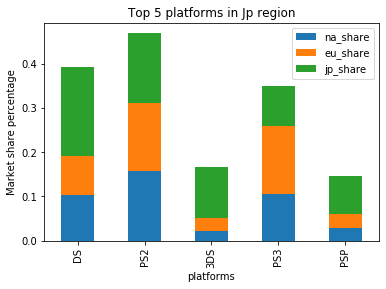

In [366]:
jp[['na_share','eu_share','jp_share']].plot(kind='bar',stacked=True)
plt.xlabel('platforms')
plt.ylabel('Market share percentage')
plt.title('Top 5 platforms in Jp region')

DS has the highest market share for jp.

In [367]:
na=na.append(eu)
na=na.append(jp)

In [368]:
na=na.drop_duplicates()
na.reset_index(inplace=True)
na

,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales,na_share,eu_share,jp_share,other_share
0,X360,595.74,268.32,12.30,84.88,961.24,0.162963,0.124900,0.014168,0.114990
1,PS2,572.92,332.63,137.54,190.47,1233.56,0.156721,0.154835,0.158427,0.258037
2,Wii,486.87,258.32,68.28,77.71,891.18,0.133182,0.120245,0.078649,0.105277
3,PS3,390.13,327.21,79.41,134.59,931.34,0.106719,0.152313,0.091469,0.182334
4,DS,380.31,188.41,175.00,59.04,802.76,0.104033,0.087703,0.201576,0.079984
5,3DS,82.65,61.27,100.62,13.27,257.81,0.022609,0.028520,0.115900,0.017977
6,PSP,107.27,65.62,75.88,40.76,289.53,0.029343,0.030545,0.087403,0.055219


In [369]:
na.set_index('platform',inplace=True)

Text(0.5, 1.0, 'Market share of top  platforms')

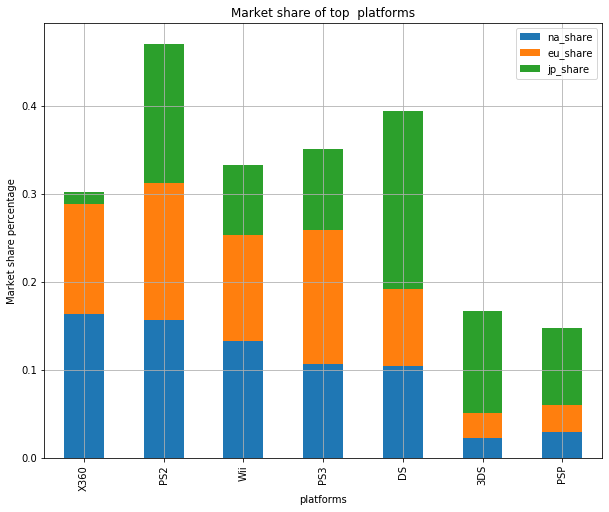

In [370]:
na[['na_share','eu_share','jp_share']].plot(kind='bar',stacked=True,figsize=(10,8),grid=True)
#plt.xticks(na['platform'].to_list())
plt.xlabel('platforms')
plt.ylabel('Market share percentage')
plt.title('Market share of top  platforms')

For eu region X360 has the third highest share and for jp it has the lowest share.PS2 which is best selling in eu has second highest market share for na and jp.DS which has highest market share for jp is fifth in market share for na and eu.   

Wii and PS3 also performs quite well in all these regions. Wii is 3rd for market share in na,4th for eu and 7th for jp.PS3 is 4th for na,2nd for eu and sixth for jp.

3DS and PSP have higher market share for jp then for eu and na.

# Most profitable genre for each region

In [371]:
na_genre=df.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
na_genre.head()

genre
Action          767.18
Sports          604.48
Shooter         503.00
Misc            377.22
Role-Playing    299.59
Name: na_sales, dtype: float64

In [372]:
eu_genre=df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
eu_genre.head()

genre
Action     475.26
Sports     346.61
Shooter    297.75
Racing     203.13
Misc       200.44
Name: eu_sales, dtype: float64

In [373]:
jp_genre=df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
jp_genre.head()

genre
Role-Playing    260.41
Action          135.13
Misc             89.75
Sports           82.71
Platform         56.93
Name: jp_sales, dtype: float64

Text(0, 0.5, 'sales')

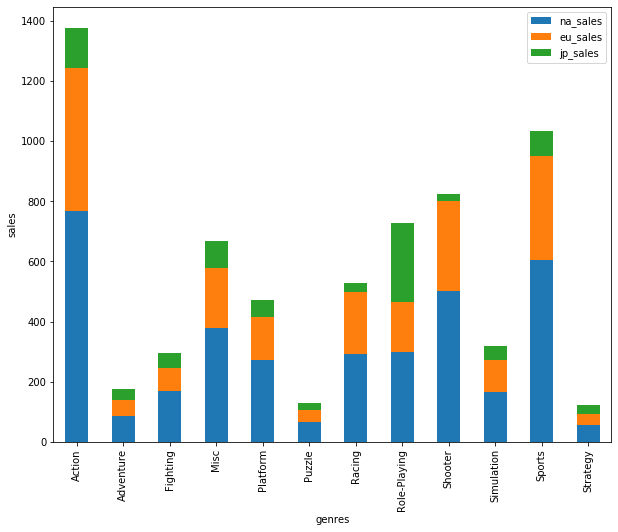

In [374]:
genre_df=(pd.concat([df.groupby('genre')['na_sales'].sum(),
                     df.groupby('genre')['eu_sales'].sum(),
                     df.groupby('genre')['jp_sales'].sum()],axis=1))
genre_df.plot(kind='bar',stacked=True,figsize=(10,8))
plt.xlabel('genres')
plt.ylabel('sales')

The most profitable genre for na and eu region is action followed by sports then shooter but for jp region the most profitable genre is role playing followed by action but shooter is not even in the top 5. Hence we cannot generalise genres with high sales and low sales.

In [375]:
#effect of rating on sales in different regions
r=df.pivot_table(index='rating',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')
r['eu_sales']=r['eu_sales']/df['eu_sales'].sum()
r['jp_sales']=r['jp_sales']/df['jp_sales'].sum()
r['na_sales']=r['na_sales']/df['na_sales'].sum()
r

,eu_sales,jp_sales,na_sales
rating,,,
AO,0.000284,0.000000,0.000345
E,0.329566,0.223668,0.351399
E10+,0.087963,0.046766,0.096371
EC,0.000051,0.000000,0.000558
M,0.227340,0.071185,0.203815
RP,0.000014,0.000000,0.000000
T,0.193848,0.167953,0.203675


Text(0, 0.5, 'sales')

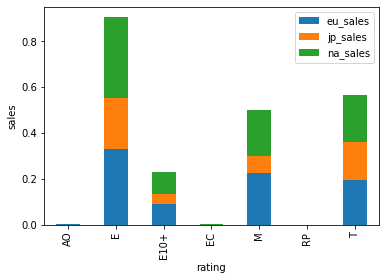

In [376]:
r.plot(kind='bar',stacked=True)
plt.xlabel('rating')
plt.ylabel('sales')

The sales for games with rating E in each region are significantly higher than others.The second highest sales for eu and na are for rating M and for jp are for rating T.

# Testing of Hypothesis

Null Hypothesis:The average user score for platforms Xbox One and PC is same.
Alternate Hypothesis:The average user score for these two platforms is not same.

To test this hypothesis we will use t test for independent samples as the user scores on one platform are independent of that on the other platforms and these two samples have been drawn from the same population video games user score.

In [377]:
xbox=df[df['platform']=='XOne']['user_score'].copy()
xbox.dropna(inplace=True)
pc=df[df['platform']=='PC']['user_score'].copy()
pc.dropna(inplace=True)
from scipy import stats as st
alpha=0.5
results=st.ttest_ind(xbox,pc)
print('pvalue:',results.pvalue)
if results.pvalue<alpha:
    print('We reject null hypothesis')
else:
    print('We do not reject null hypothesis')

pvalue: 0.00017587190481386012
We reject null hypothesis


The null hypothesis is rejected which means that the average user score for Xbox One and PC platforms differs significantly.The p value is very small,close to 0 which implies there is a very small probability of getting a difference of this magnitude between the average user scores for these two platforms.  Since the p value is so small we would get the same result on reducing alpha value to 0.01. Also because the p value is so small it means that there is a huge difference between the average user score for these platforms.

Null Hypothesis: Average user score for Action and Sports genres are same.
Alternate Hypothesis: Average user score for Action and Sports genres is different.

We will use t test for independent samples as the user score for action games does not depend on the user score for sports games and vice versa, hence these samples are independent.Also both these are samples from the same population video games user scores.

In [378]:
action=df[df['genre']=='Action']['user_score'].copy()
action.dropna(inplace=True)
sports=df[df['genre']=='Sports']['user_score'].copy()
sports.dropna(inplace=True)
results2=st.ttest_ind(action,sports)
alpha=0.05
print('p value:',results2.pvalue)
if results2.pvalue<alpha:
    print('We reject null hypothesis')
else:
    print('We do not reject null hypothesis')

p value: 0.10840907847900544
We do not reject null hypothesis


The null hypothesis is not rejected at 5% level of significance which means that the average user score for action and sports genre does not differ significantly.There is a 10.4% chance of getting a difference of this magnitude.

# Conclusion

The data available to us is from 1980 to 2016.The sales for games in the data rose from 1980 to 2008 and then fell till 2016 on average. The data contained missing values for critic score,user score and ESRB rating mainly for old time period (from 1980 to 1999).We filled missing scores and ratings with average scores for user and critic score respectively only for those games for which these scores were available on other platforms. For identifying profitable games in year 2017 we consider data from 1999 to 2016.

Analyzing the data we find average lifespan of a platform is 7 years. The most popular platforms in the data are PS2, X360, PS3, Wii, DS,PS these are the highest grossing platforms in our data.PS2 was popular from 2000 to 2016 then it started fading,then X360,PS3,Wii became popular,their sales rose from 2006 to 2010 and then they started fading.DS made it's first sale in 1985 and then next from 2005 to 2010.PS was in business from 1994 to 2003.Growing platforms in the data are PS4,XOne,PSV,WiiU,3DS.Shrinking platforms are X360,Wii,PSP,PS3,PC
and all popular platforms have either faded or are shrinking.

To determine the effect of reviews on sales of games we selected platform X360 because we have highest percentage of scores for this platform.We found that sales depend linearly on critic scores more than on user scores.

Effect of genre on sales:Action games are most popular and most profitable so are sports games. But shooter games are sixth in popularity but 3rd in sales.Adventure games have high number of sales but very low total sales.We can not generalise genres by high and low sales as on the most popular platforms in our data different genres had highest share of total sales.Also the most profitable genre for na and eu region is action followed by sports then shooter but for jp region the most profitable genre is role playing followed by action but shooter is not even in the top 5.

X360 has highest market share for na.For eu region X360 has the third highest share and for jp it has the 7th highest share.PS2 is best selling in eu and has second highest market share for na and jp.DS has highest market share for jp and is fifth in market share for eu and na. Wii and PS3 also performs quite well in all these regions. Wii is 3rd for market share in na,4th for eu and 6th for jp.PS3 is 4th for na and jp,2nd for eu.

The highest sales in each region are for rating E.The second highest sales for eu and na are for rating M and for jp are for rating T.

After testing we conclude that the average user score for Xbox One and PC platforms differs significantly and the average user score for action and sports video games does not differ significantly.